<a href="https://colab.research.google.com/github/dionysus98/l_torch/blob/main/02_torch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. NN classification


## 1. Data

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

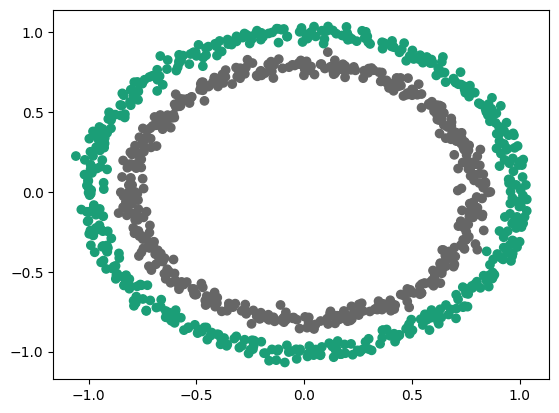

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.Dark2)

### 1.1 check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# features and lables
X_sample = X[0]
y_sample = y[0]

X_sample, X_sample.shape, y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

### 1.2 convert data to tensor

In [10]:
import torch
torch.__version__

'2.3.1+cu121'

In [11]:
if not type(X) == torch.Tensor:
  X = torch.from_numpy(X).type(torch.float)

if not type(y) == torch.Tensor:
  y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# splitting datra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                        y,
                                        test_size=0.2,

                                        random_state=42)

In [13]:
len(X_train), len(y_train)

(800, 800)

## 2. Build a Model

In [14]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [15]:
# create a NN
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(
        in_features=2,
        out_features=5)

    self.layer_2 = nn.Linear(
        in_features=5,
        out_features=1)

    # self.layers = nn.Sequential(
    # nn.Linear(in_features=2,out_features=5),
    # nn.Linear(in_features=5,out_features=1),)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))
    # return self.layers(x)

In [16]:
model_0 = CircleModelV1().to(device)
model_0.state_dict(), next(model_0.parameters()).device

(OrderedDict([('layer_1.weight',
               tensor([[ 0.6735, -0.6569],
                       [ 0.2162,  0.6225],
                       [ 0.1989, -0.4526],
                       [ 0.3383, -0.4108],
                       [ 0.5338,  0.5807]], device='cuda:0')),
              ('layer_1.bias',
               tensor([ 0.6039, -0.5485, -0.3306, -0.0773, -0.1468], device='cuda:0')),
              ('layer_2.weight',
               tensor([[ 0.2426, -0.1427,  0.1060, -0.2163,  0.3440]], device='cuda:0')),
              ('layer_2.bias', tensor([0.0396], device='cuda:0'))]),
 device(type='cuda', index=0))

In [17]:
# use NN sequential, same result as Subclassing nn.Module as before.
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1),
).to(device)

model_0.state_dict(),

(OrderedDict([('0.weight',
               tensor([[-0.2323,  0.3654],
                       [ 0.0631,  0.4447],
                       [ 0.2704,  0.3258],
                       [-0.5209, -0.1922],
                       [ 0.6349, -0.0632]], device='cuda:0')),
              ('0.bias',
               tensor([-0.4506,  0.2302,  0.0624,  0.2768,  0.0129], device='cuda:0')),
              ('1.weight',
               tensor([[ 0.3359, -0.3466,  0.0555,  0.1250, -0.1521]], device='cuda:0')),
              ('1.bias', tensor([0.3596], device='cuda:0'))]),)

In [18]:
# Make Predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds.shape, len(untrained_preds), untrained_preds[:10]

(torch.Size([200, 1]),
 200,
 tensor([[ 0.2381],
         [ 0.1342],
         [ 0.3466],
         [ 0.2081],
         [ 0.0859],
         [ 0.0245],
         [-0.0618],
         [-0.0881],
         [ 0.3574],
         [ 0.1243]], device='cuda:0'))

In [19]:
X_test[:10], y_test[:10],

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 loss function & optimizer

In [20]:
## Loss function: Binary Cross Entropy
lfn = nn.BCEWithLogitsLoss()
optm = torch.optim.SGD(params=model_0.parameters(),
                       lr=0.1)

In [21]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct/len(y_pred)) * 100

## 3. Train

### 3.1 Logits -> Pred Probabilities -> Pred Labels

- use `sigmoid` for `logit -> pred prob` for `BCE`

In [22]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits, y_test[:5]

(tensor([[0.2381],
         [0.1342],
         [0.3466],
         [0.2081],
         [0.0859]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [23]:
# use Activation: Sigmoid
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs,

(tensor([[0.5593],
         [0.5335],
         [0.5858],
         [0.5518],
         [0.5215]], device='cuda:0'),)

In [24]:
y_preds = torch.round(y_pred_probs).squeeze()
y_preds, y_test[:5]

(tensor([1., 1., 1., 1., 1.], device='cuda:0'), tensor([1., 0., 1., 0., 1.]))

### 3.2 training loop

In [25]:
epoch_count = []
loss_values = []
acc_values = []
test_loss_values = []
test_acc_values = []

epochs = 100
torch.manual_seed(42)

# Data on Target Device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  # forward
  y_logit = model_0(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logit)
  y_pred = torch.round(y_pred_probs)

  loss = lfn(y_logit, y_train) ## BCEwithlogitloss expects logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optm.zero_grad()
  loss.backward()
  optm.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    y_test_logit = model_0(X_test).squeeze()
    y_test_pred_probs = torch.sigmoid(y_test_logit)
    y_test_pred = torch.round(y_test_pred_probs)
    test_loss = lfn(y_test_logit, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=y_test_pred)

  # logging
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    acc_values.append(acc)
    test_loss_values.append(test_loss)
    test_acc_values.append(test_acc)
    print(f"k: {epoch} | l: {loss:.5f} | Acc: {acc:.2f}| tl: {test_loss:.5f} | TAcc : {test_acc:.2f}")


k: 0 | l: 0.70041 | Acc: 53.00| tl: 0.69606 | TAcc : 57.50
k: 10 | l: 0.69766 | Acc: 51.38| tl: 0.69420 | TAcc : 55.00
k: 20 | l: 0.69616 | Acc: 51.38| tl: 0.69339 | TAcc : 51.50
k: 30 | l: 0.69529 | Acc: 51.50| tl: 0.69305 | TAcc : 50.00
k: 40 | l: 0.69472 | Acc: 50.88| tl: 0.69294 | TAcc : 51.00
k: 50 | l: 0.69433 | Acc: 50.62| tl: 0.69293 | TAcc : 50.50
k: 60 | l: 0.69405 | Acc: 50.62| tl: 0.69297 | TAcc : 50.50
k: 70 | l: 0.69383 | Acc: 50.88| tl: 0.69305 | TAcc : 50.00
k: 80 | l: 0.69366 | Acc: 50.50| tl: 0.69314 | TAcc : 47.50
k: 90 | l: 0.69353 | Acc: 50.38| tl: 0.69323 | TAcc : 50.50


## 4. Make predictions and Evaluate

model sucks as of now,
do some predictions.

In [26]:
import requests
from pathlib import Path

helper_file = "helper_functions.py"

if not Path(helper_file).is_file():
  url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
  req = requests.get(url)
  with open(helper_file, "wb") as f:
    f.write(req.content)

from helper_functions import plot_predictions, plot_decision_boundary

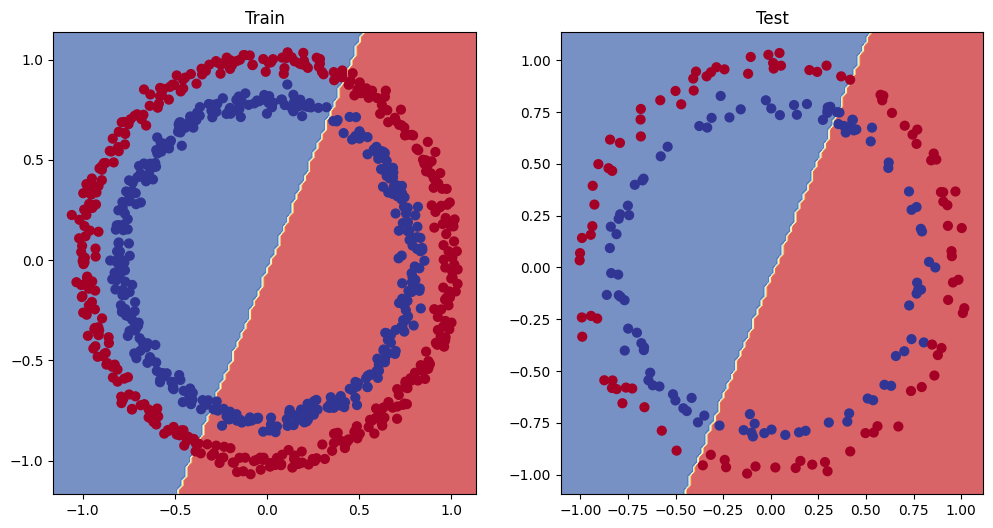

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving Model (Technical)

- Add more layers
- Add more hidden units
- Fit for longer
- Change the Learning rate
- Change the loss function

In [28]:
from torch import Tensor

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=10)
    self.layer_2 = nn.Linear(in_features=10,
                             out_features=10)
    self.layer_3 = nn.Linear(in_features=10,
                             out_features=1)

  def forward(self, x: Tensor) -> Tensor:
    return self.layer_3(
        self.layer_2(
            self.layer_1(x)))

In [29]:
model_1 = CircleModelV1().to(device)

model_1,

(CircleModelV1(
   (layer_1): Linear(in_features=2, out_features=10, bias=True)
   (layer_2): Linear(in_features=10, out_features=10, bias=True)
   (layer_3): Linear(in_features=10, out_features=1, bias=True)
 ),)

In [30]:
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


X_train.shape, y_train.shape, X_test.shape, y_test.shape

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  Y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  optim.zero_grad()
  loss.backward()
  optim.step()

  # testing
  model_1.eval()
  with torch.inference_mode():
    y_test_logits = model_1(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=y_test_preds)

  # logging
  if epoch % 100 == 0:
    print(f"k: {epoch} | L: {loss} | tl: {test_loss} | ta: {test_acc}")

k: 0 | L: 0.6939550638198853 | tl: 0.6926146745681763 | ta: 51.0
k: 100 | L: 0.6930478811264038 | tl: 0.6937904357910156 | ta: 48.0
k: 200 | L: 0.6929860711097717 | tl: 0.6943727135658264 | ta: 46.0
k: 300 | L: 0.6929804682731628 | tl: 0.6945767998695374 | ta: 45.0
k: 400 | L: 0.6929799318313599 | tl: 0.6946452260017395 | ta: 46.0
k: 500 | L: 0.6929798722267151 | tl: 0.6946680545806885 | ta: 46.0
k: 600 | L: 0.6929798722267151 | tl: 0.6946756839752197 | ta: 46.0
k: 700 | L: 0.6929798722267151 | tl: 0.6946782469749451 | ta: 46.0
k: 800 | L: 0.6929798722267151 | tl: 0.6946790814399719 | ta: 46.0
k: 900 | L: 0.6929798722267151 | tl: 0.6946793794631958 | ta: 46.0


### 5.1 Check for straight line

In [32]:
w = 0.7
b = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(1)
y_regression = w * X_regression + b

X_regression[:5], y_regression[:5],

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [33]:
## create train and test split

train_split = int(0.8 * len(X_regression))
X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split],
X_test_reg, y_test_reg = X_regression[train_split:], y_regression[train_split:],

len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg),

(80, 80, 20, 20)

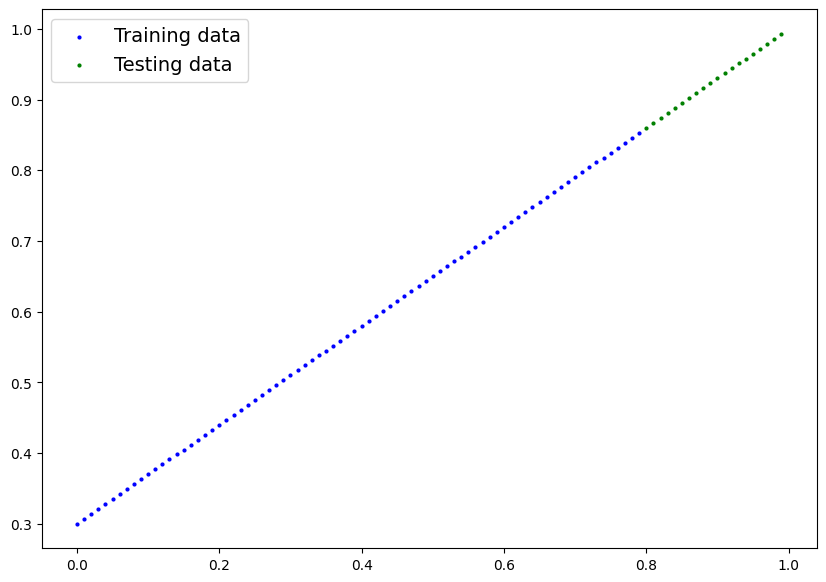

In [34]:
from helper_functions import plot_predictions

plot_predictions(train_data=X_train_reg, train_labels=y_train_reg
                 ,test_data=X_test_reg, test_labels=y_test_reg
                 )

In [35]:
model_1,

(CircleModelV1(
   (layer_1): Linear(in_features=2, out_features=10, bias=True)
   (layer_2): Linear(in_features=10, out_features=10, bias=True)
   (layer_3): Linear(in_features=10, out_features=1, bias=True)
 ),)

### 5.2 Adjusting `model_1` to fit staright Line


In [36]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

model_2,

(Sequential(
   (0): Linear(in_features=1, out_features=10, bias=True)
   (1): Linear(in_features=10, out_features=10, bias=True)
   (2): Linear(in_features=10, out_features=1, bias=True)
 ),)

In [37]:
loss_fn = nn.L1Loss()
optm = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [38]:
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)

X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# train
epochs = 1000

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_reg)
  loss = loss_fn(y_pred, y_train_reg)

  optm.zero_grad()
  loss.backward()
  optm.step()

  # testing
  with torch.inference_mode():
    test_preds = model_2(X_test_reg)
    test_loss = loss_fn(test_preds, y_test_reg)

  if epoch % 100 == 0:
    print(f"k: {epoch} | l: {loss} | tl: {test_loss}")

k: 0 | l: 0.7598585486412048 | tl: 0.9110288619995117
k: 100 | l: 0.028579523786902428 | tl: 0.0008127063629217446
k: 200 | l: 0.02532539702951908 | tl: 0.0020921409595757723
k: 300 | l: 0.021374762058258057 | tl: 0.0030510127544403076
k: 400 | l: 0.01964486762881279 | tl: 0.003407776355743408
k: 500 | l: 0.019402215257287025 | tl: 0.0038725852500647306
k: 600 | l: 0.019032424315810204 | tl: 0.0037891955580562353
k: 700 | l: 0.018782908096909523 | tl: 0.003813472343608737
k: 800 | l: 0.018397415056824684 | tl: 0.0032875032629817724
k: 900 | l: 0.017980288714170456 | tl: 0.003603896591812372


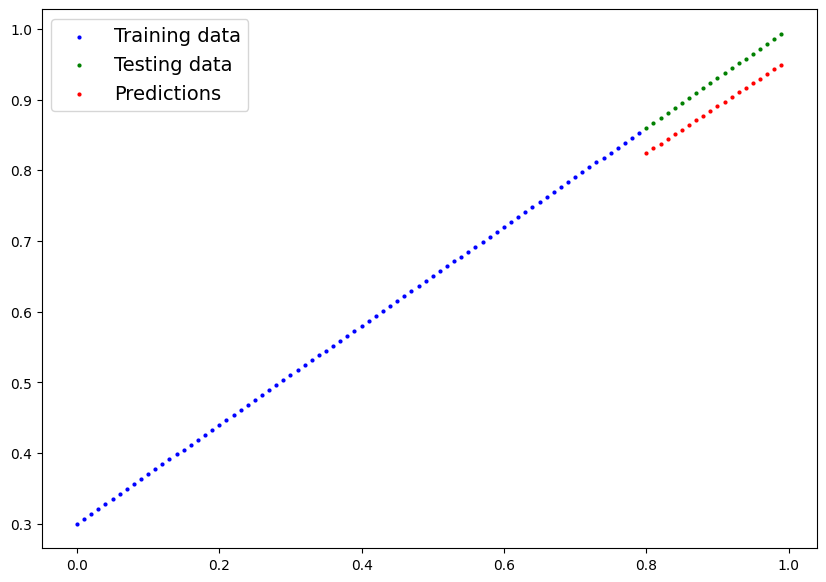

In [40]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_reg)

plot_predictions(
    train_data=X_train_reg.cpu().numpy(),
    train_labels=y_train_reg.cpu().numpy(),
    test_data=X_test_reg.cpu().numpy(),
    test_labels=y_test_reg.cpu().numpy(),
    predictions=y_preds.cpu().numpy())

## 6. Non Linearity

### 6.1 DATA: Recreating non-linear data

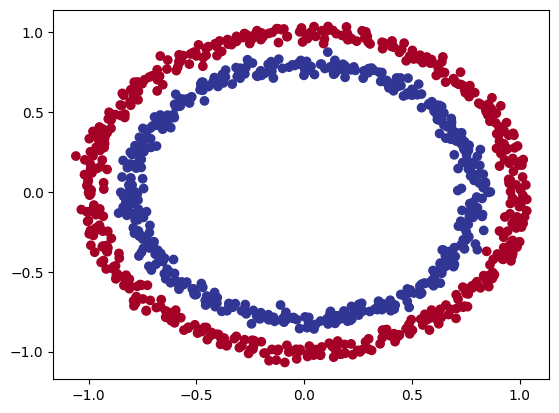

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [96]:
import torch
from sklearn.model_selection import train_test_split

if not type(X) == torch.Tensor:
  X = torch.from_numpy(X).type(torch.float)

if not type(y) == torch.Tensor:
  y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [45]:
X_train,  X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 building a non-linear model

In [58]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(
        self.relu(self.layer_2(
            self.relu(self.layer_1(x)))))


In [59]:
model_3 = CircleModelV2().to(device)
model_3,

(CircleModelV2(
   (layer_1): Linear(in_features=2, out_features=10, bias=True)
   (layer_2): Linear(in_features=10, out_features=10, bias=True)
   (layer_3): Linear(in_features=10, out_features=1, bias=True)
   (relu): ReLU()
 ),)

In [60]:
loss_fn = nn.BCEWithLogitsLoss()
optm = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 train non-linear

In [61]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [64]:
epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_preds)

  optm.zero_grad()

  loss.backward()

  optm.step()

  #testing
  model_3.eval()
  with torch.inference_mode():
    y_test_logits = model_3(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(y_test_logits, y_test)
    acc = accuracy_fn(y_true=y_test,y_pred=y_test_preds)


  if epoch % 100 == 0:
    print(f"k: {epoch}, l: {loss}, a: {acc}")


k: 0, l: 0.5681842565536499, a: 86.5
k: 100, l: 0.4815295338630676, a: 90.5
k: 200, l: 0.37056171894073486, a: 92.0
k: 300, l: 0.2545759081840515, a: 96.5
k: 400, l: 0.17179812490940094, a: 97.5
k: 500, l: 0.12187686562538147, a: 99.0
k: 600, l: 0.09122875332832336, a: 99.5
k: 700, l: 0.07100439816713333, a: 99.5
k: 800, l: 0.05773353949189186, a: 99.5
k: 900, l: 0.04852627217769623, a: 99.5


### 6.4 Evaluating Non_linear trained model

In [63]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

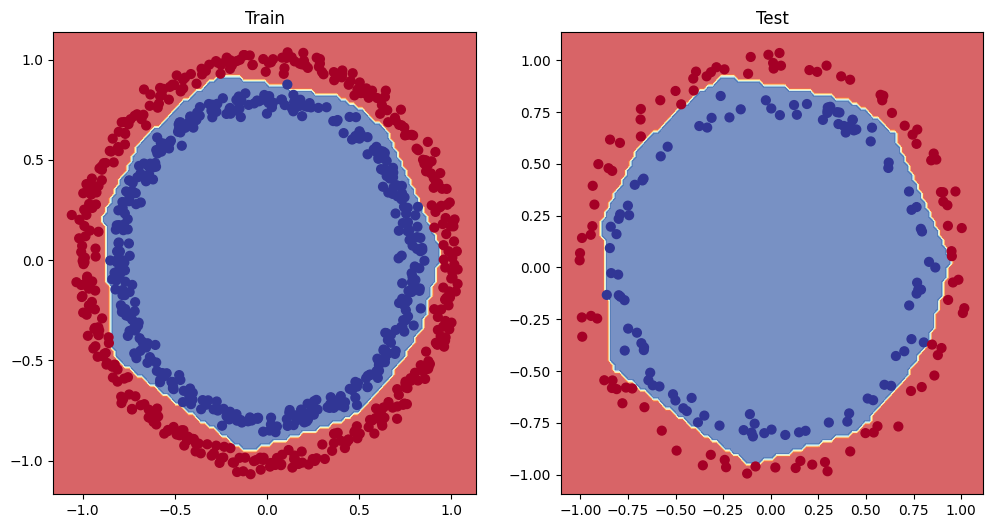

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicate Non-linear activation

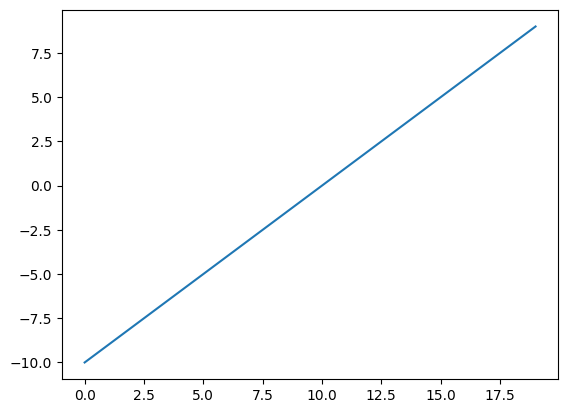

In [69]:
import matplotlib.pyplot as plt

A = torch.arange(-10,10,1.0)

plt.plot(A)

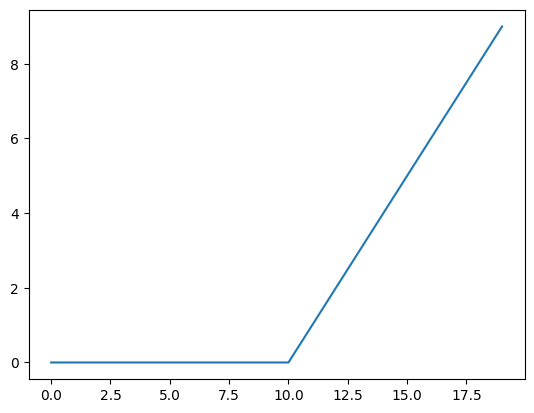

In [70]:
plt.plot(torch.relu(A))

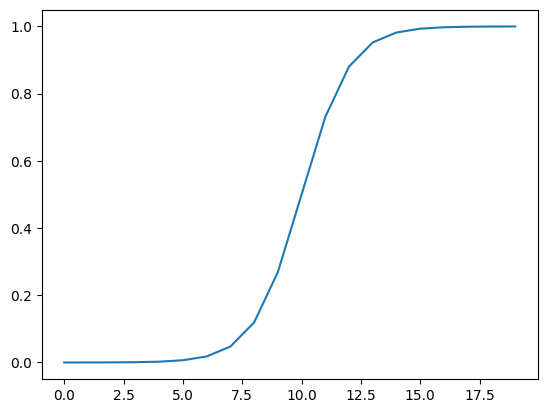

In [72]:
plt.plot(torch.sigmoid(A))

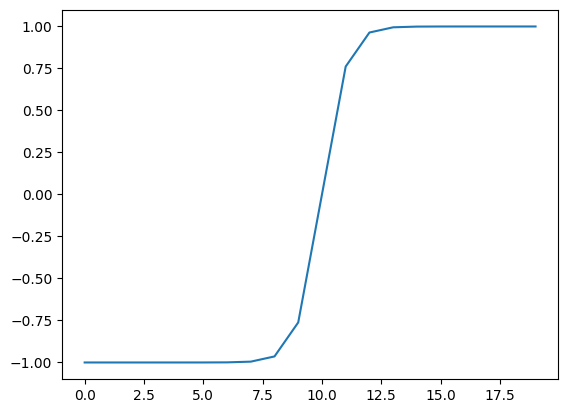

In [73]:
plt.plot(torch.tanh(A))

## 8. Puttin it all together (Multi class classification)

### 8.1 Data (Multiclass dataset)

In [74]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [78]:
sklearn.__version__

'1.2.2'

In [158]:
NUM_SAMPLES = 1000
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=NUM_SAMPLES,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

In [159]:
if not type(X_blob) == torch.Tensor:
  X_blob = torch.from_numpy(X_blob).type(torch.float)
  # X_blob = X_blob.type(torch.LongTensor)

if not type(y_blob) == torch.LongTensor:
  y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
  # y_blob = y_blob.type(torch.LongTensor)

In [160]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

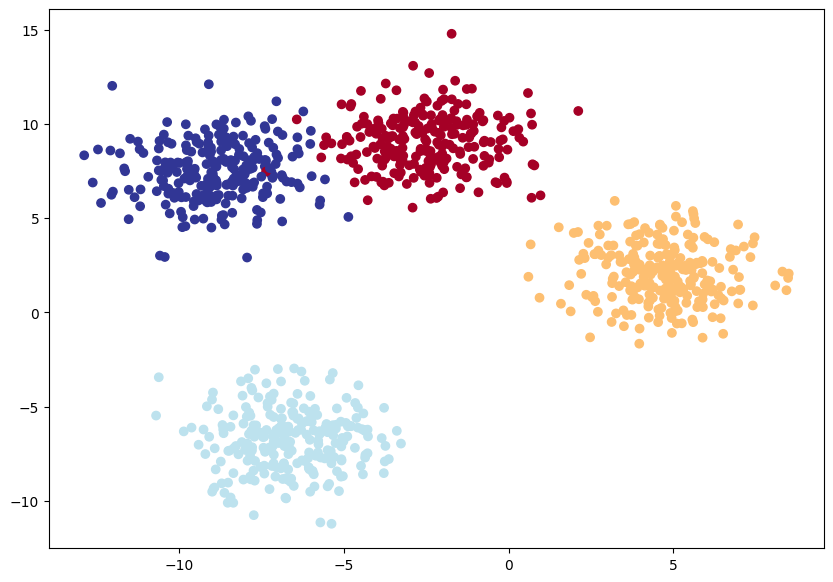

In [161]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building Model: Multiclass classification

In [124]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device,

('cuda',)

In [162]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,
                  out_features=hidden_units),
        nn.ReLU(), # would work even if non-linear is removed
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(), # because the dataset is linearly sepaarble
        nn.Linear(in_features=hidden_units,
                  out_features=output_features))

  def forward(self, x):
    return self.linear_layer_stack(x)

In [163]:
model_4 = BlobModel(
    input_features=2,
    output_features=4,
    hidden_units=8
).to(device)

model_4,

(BlobModel(
   (linear_layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=8, bias=True)
     (1): ReLU()
     (2): Linear(in_features=8, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=4, bias=True)
   )
 ),)

In [164]:
loss_fn = nn.CrossEntropyLoss()
optm = torch.optim.SGD(model_4.parameters(), lr=0.1)

### 8.4 Getting Prediction Probs

In [165]:
X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)

In [166]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_preds_probs = torch.softmax(y_logits, dim=1)

y_logits[:5], y_preds_probs[:5]

(tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
         [-0.3420, -1.7850, -0.3224, -1.1384],
         [ 0.1878, -0.8563,  0.3375, -0.9026],
         [ 0.4513, -0.4277,  0.2498, -0.1940],
         [ 0.8922, -0.9492,  0.3245, -0.5287]], device='cuda:0'),
 tensor([[0.4236, 0.1221, 0.2895, 0.1648],
         [0.3694, 0.0873, 0.3767, 0.1666],
         [0.3509, 0.1235, 0.4076, 0.1179],
         [0.3627, 0.1506, 0.2965, 0.1902],
         [0.5084, 0.0806, 0.2882, 0.1228]], device='cuda:0'))

### 8.5 Training Loop

In [169]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train).squeeze()
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)

  optm.zero_grad()
  loss.backward()
  optm.step()

  # testing
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test).squeeze()
    y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_test_logits, y_blob_test)
    acc = accuracy_fn(y_true=y_blob_test, y_pred=y_test_preds)

  if epoch % 10 == 0:
    print(f"k: {epoch}, l: {loss}, a: {acc}")


k: 0, l: 0.03760381042957306, a: 99.0
k: 10, l: 0.03400985524058342, a: 99.0
k: 20, l: 0.031499605625867844, a: 99.0
k: 30, l: 0.02947746030986309, a: 99.0
k: 40, l: 0.027896329760551453, a: 99.0
k: 50, l: 0.026619210839271545, a: 99.0
k: 60, l: 0.025560129433870316, a: 99.5
k: 70, l: 0.02466477081179619, a: 99.5
k: 80, l: 0.023896027356386185, a: 99.5
k: 90, l: 0.0232258178293705, a: 99.5


### 8.6 Evaluate the trained model


In [ ]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_test_logits = model_4(X_blob_test)

y_pred_probs = torch.softmax(y_test_logits, dim=1)

y_preds = torch.argmax(y_pred_probs, dim=1)

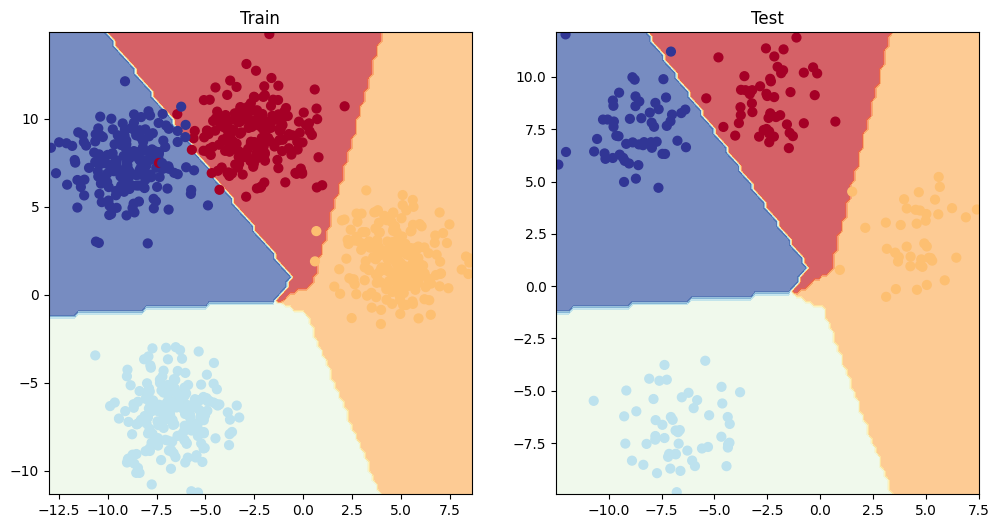

In [170]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. classification Metrics

- Accuracy
- Precision
- ReCall
- F1-score
- confusion matrix

In [171]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from torchmetrics import Accuracy

tacc = Accuracy(task="multiclass", num_classes=4).to(device)

tacc(y_preds, y_blob_test)